# Домашня робота №5

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

### Зберемо наші дані в один dataframe, а також додамо позначки для класів

In [75]:
data_path = 'data'
activities = ['idle', 'running', 'stairs', 'walking']
dfs = []

for activity in activities:
    activity_path = f'{data_path}/{activity}'
    csv_files = glob.glob(f'{activity_path}/*.csv')
    df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)
    df['Activity'] = activities.index(activity) + 1
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)


In [76]:

data

,accelerometer_X,accelerometer_Y,accelerometer_Z,Activity
0,1.000776,4.616021,8.576031,1
1,0.718261,4.209007,8.446744,1
2,-0.909797,-0.282516,9.203311,1
3,5.099650,0.148441,8.418014,1
4,1.762132,-0.162806,9.251195,1
...,...,...,...,...
132745,5.109226,-15.452178,-1.470040,4
132746,6.373365,-11.741165,-8.226476,4
132747,3.289633,-9.993398,-0.383072,4
132748,-2.978387,-3.050213,1.273715,4


In [77]:
data.shape

(132750, 4)

### Додамо додаткові фічі

In [78]:
def extract_time_features(data):
    features = data[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
    data['mean'] = features.mean(axis=1)
    data['std'] = features.std(axis=1)
    data['max'] = features.max(axis=1)
    data['min'] = features.min(axis=1)
    data['range'] = data['max'] - data['min']
    return data

data = extract_time_features(data)
data

,accelerometer_X,accelerometer_Y,accelerometer_Z,Activity,mean,std,max,min,range
0,1.000776,4.616021,8.576031,1,4.730943,3.788935,8.576031,1.000776,7.575255
1,0.718261,4.209007,8.446744,1,4.458004,3.870253,8.446744,0.718261,7.728483
2,-0.909797,-0.282516,9.203311,1,2.670333,5.666412,9.203311,-0.909797,10.113108
3,5.099650,0.148441,8.418014,1,4.555368,4.161567,8.418014,0.148441,8.269573
4,1.762132,-0.162806,9.251195,1,3.616840,4.973511,9.251195,-0.162806,9.414001
...,...,...,...,...,...,...,...,...,...
132745,5.109226,-15.452178,-1.470040,4,-3.937664,10.500462,5.109226,-15.452178,20.561404
132746,6.373365,-11.741165,-8.226476,4,-4.531425,9.605941,6.373365,-11.741165,18.114530
132747,3.289633,-9.993398,-0.383072,4,-2.362279,6.859131,3.289633,-9.993398,13.283031
132748,-2.978387,-3.050213,1.273715,4,-1.584962,2.475947,1.273715,-3.050213,4.323928


In [79]:
data.shape

(132750, 9)

### Розділимо дані 

In [81]:
X = data[['mean', 'std', 'max', 'min', 'range']]
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Навчаємо за допомогою SVM

In [83]:
svm_model = SVC(C=1.0, kernel='rbf', degree=3)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm}")


Accuracy of SVM: 0.8361079723791588


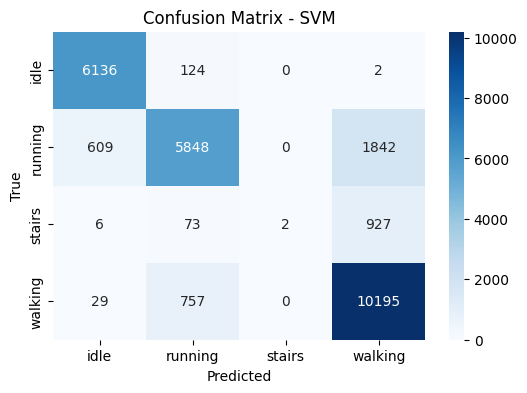

In [70]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Навчаємо за допомогою Random Forest

In [59]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf}")


Accuracy of Random Forest: 0.9998870056497176


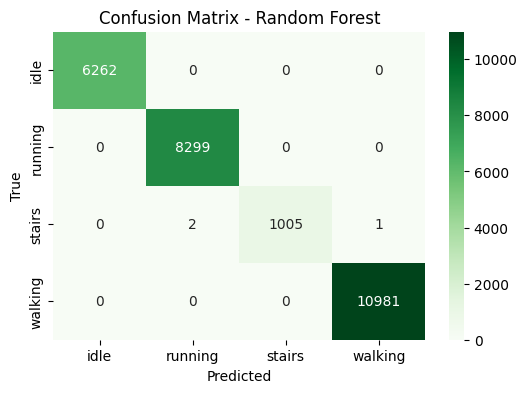

In [64]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()